In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

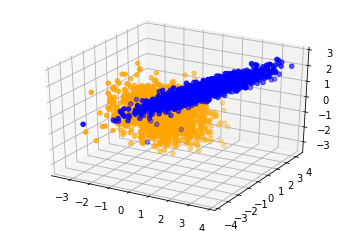

In [2]:
dfx = pd.read_csv('./Training Data/Logistic_X_Train.csv')
dfy = pd.read_csv('./Training Data/Logistic_Y_Train.csv')
df_col = pd.concat([dfx,dfy], axis=1)
df0 = df_col[df_col['label'] == 0]
df1 = df_col[df_col['label'] == 1]
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.scatter(df0.f1, df0.f2, df0.f3, c='blue')
axes.scatter(df1.f1, df1.f2, df1.f3, c='orange')

In [3]:
X_train = dfx.values
Y_train = dfy.values.reshape((-1,))

In [4]:
dfx_test = pd.read_csv('./Testing Data/Logistic_X_Test.csv')
X_test = dfx_test.values

In [5]:
W = 2*np.random.random((X_train.shape[1],))
b = 5*np.random.random()

In [6]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-1.0*x))


def h(x, w, b):
    hx = np.dot(x, w) + b
    return sigmoid(hx)

def err(y, x, w, b):
    m = x.shape[0]
    err = 0.0
    for i in range(m):
        hx = h(x[i],w,b)
        err += y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)
    return err/m

def grad(y, x, w, b):
    g_w = np.zeros(w.shape)
    g_b = 0
    for i in range(x.shape[0]):
        hh = h(x[i], w, b)
        g_w += (y[i] - hh)*x[i]
        g_b += (y[i] - hh)
    return [g_w/x.shape[0], g_b/x.shape[0]]


def log_reg(y, x, w, b):
    error = []
    for i in range(2000):
        [g_w, g_b] = grad(y, x, w, b)
        w = w + 0.1*g_w
        b += 0.1*g_b
        error.append(err(y, x, w, b))
    print(grad(y, x, w, b))
    return w, b, error

In [7]:
def predict(x,w,b):
    
    confidence = h(x,w,b)
    if confidence<0.5:
        return 0
    else:
        return 1


In [8]:
w, B, error = log_reg(Y_train, X_train, W, b)

[array([-0.00333002,  0.00341512, -0.00075213]), -0.005240515293168323]


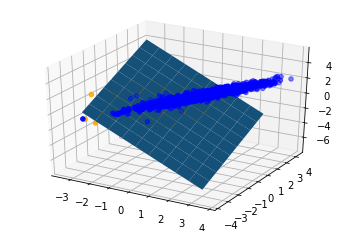

In [9]:
a, b, c, d = w[0], w[1], w[2], B
x = np.linspace(-3, 3, 10)
y = np.linspace(-3, 3, 10)

X, Y = np.meshgrid(x, y)
Z = (-d - a*X - b*Y) / c

fig = plt.figure()
axes = fig.gca(projection='3d')
axes.scatter(df0.f1, df0.f2, df0.f3, c='blue')
axes.scatter(df1.f1, df1.f2, df1.f3, c='orange')
surf = axes.plot_surface(X, Y, Z)
plt.show()

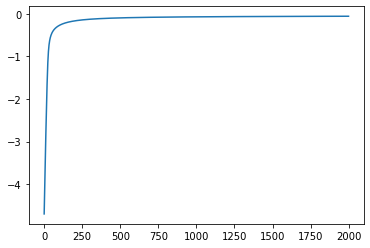

In [10]:
plt.plot(error)

In [11]:
dfxtest = pd.read_csv("./Testing Data/Logistic_X_Test.csv")
X_test = dfxtest.values
X_test.shape[0]

1000

In [12]:
Y = []

In [13]:
for i in range(X_test.shape[0]):
    Y.append(predict(X_test[i], w, B))

In [14]:
Y = np.array(Y)
Y.shape

(1000,)

In [15]:
ypred = {'label':Y}
dfytest = pd.DataFrame(data = ypred)

In [16]:
df_coltest = pd.concat([dfxtest, dfytest], axis=1)

In [17]:
df_coltest

,f1,f2,f3,label
0,-0.767508,-0.261859,-2.514831,1
1,-1.241653,1.449001,-0.413089,1
2,1.925270,1.931761,1.342619,0
3,-1.298255,1.049761,-0.527319,1
4,-0.964712,0.938088,-1.186328,1
...,...,...,...,...
995,2.877461,3.043965,2.308939,0
996,3.128835,3.115084,1.856309,0
997,-1.186969,0.947347,-0.786386,1
998,-0.532324,1.845170,-0.993550,1


In [18]:
df0test = df_coltest[df_coltest['label'] == 0]
df1test = df_coltest[df_coltest['label'] == 1]

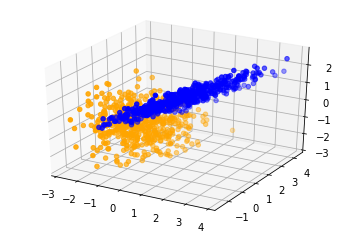

In [19]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.scatter(df0test.f1, df0test.f2, df0test.f3, c='blue')
axes.scatter(df1test.f1, df1test.f2, df1test.f3, c='orange')